In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt 

from utils.conv import numpy_conv
from utils.seed import SeedSetter
from utils.plots import plot_from_tensor
from utils.sobel import sobel
from modules.filters import GaussianFilter, BoxFilter, UnsharpMaskFilter

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
SeedSetter(42)

Random seed set to 42


1. Реалiзувати операцiю згортки для матрицi з нуля за допомогою NumPy.

In [4]:
kernel = np.array(
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ]
)
image = np.array(
    [
        [45, 63, 27, 90, 34],
        [36, 18, 81, 9, 87],
        [9, 54, 72, 99, 56],
        [83, 23, 12, 43, 54],
        [27, 8, 19, 67, 69],
    ]
)

In [5]:
output = numpy_conv(image=image, kernel=(1/9) * kernel, stride=1, padding=0)
output

array([[45.        , 57.        , 61.66666667],
       [43.11111111, 45.66666667, 57.        ],
       [34.11111111, 44.11111111, 54.55555556]])

2. Обрати будь-яке кольорове зображення. Зчитати його за допомогою бiблiотеки cv2 командою cv2.imread.

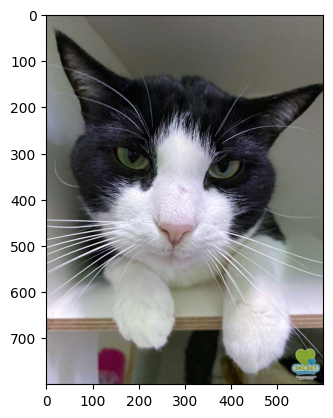

In [6]:
image = cv2.imread('../data/cat.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image) 
plt.show() 

3. Застосувати до зображення власний фiльтр Гауса, box-фiльтр, unsharp masking. Вiзуалiзувати результати. 

In [8]:
torch_image = torch.from_numpy(image)
torch_image = torch.tensor(np.array(image)).float() / 255.0  # normalize to [0, 1]
torch_image = torch_image.permute(2, 0, 1).unsqueeze(0)  # shape to [1, C, H, W]
torch_image.shape

torch.Size([1, 3, 800, 600])

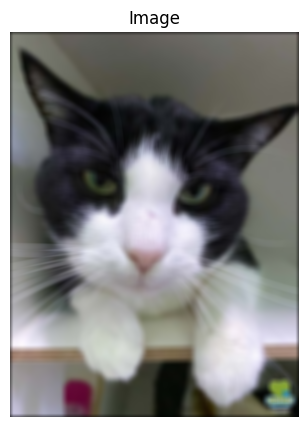

In [8]:
gauss_filter = GaussianFilter(kernel_size=15, sigma=10.0)
blured = gauss_filter.apply(torch_image)
plot_from_tensor(blured)

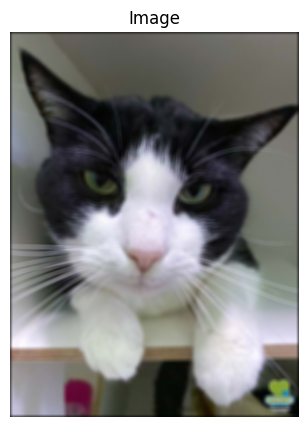

In [15]:
box_filter = BoxFilter(kernel_size=10, stride=2)
box_blured = box_filter.apply(torch_image)
plot_from_tensor(box_blured)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


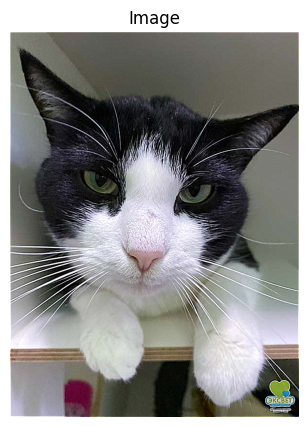

In [9]:
unsharp_filter = UnsharpMaskFilter(kernel_size=5, sigma=2.0, amount=1.5, stride=1)
sharpened = unsharp_filter.apply(torch_image)
plot_from_tensor(sharpened)

4. Виконати видiлення границь на зображеннi за допомогою оператору Собеля.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


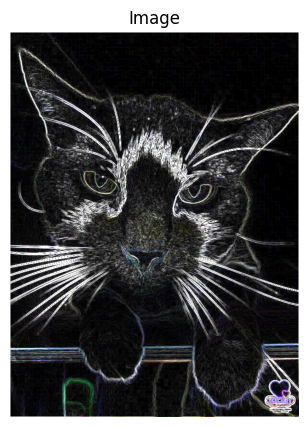

In [10]:
borders = sobel(torch_image)
plot_from_tensor(borders)

5. Дослiдити варiанти нормалiзацiї зображення. Виконати min-max нормалiзацiю зображення, стандартизацiю зображення (image standardization).

In [21]:
import torch

def min_max_normalize(image: torch.Tensor) -> torch.Tensor:
    min_val = image.min()
    max_val = image.max()
    normalized = (image - min_val) / (max_val - min_val)
    return normalized

def standardize_image(image: torch.Tensor) -> torch.Tensor:
    image = image.to(torch.float32)  
    mean = image.mean()
    std = image.std()
    standardized = (image - mean) / std
    return standardized

In [22]:
torch_image = torch.from_numpy(image)
torch_image[0][0]

tensor([130, 132, 121], dtype=torch.uint8)

In [23]:
normalized_image = min_max_normalize(torch_image)
normalized_image[0][0]

tensor([0.5098, 0.5176, 0.4745])

In [24]:
standardized_image = standardize_image(torch_image)
standardized_image[0][0]

tensor([0.2497, 0.2795, 0.1157])

## Контрольні запитання



1. Як обчислюється операцiя згортки? Що таке ядро згортки?
<br>Операція згортки обчислюється шляхом накладання невеликої матриці (ядра) на частину зображення, після чого кожен елемент ядра множиться на відповідний піксель, а результати множень підсумовуються. Отримане значення записується в нову матрицю, і ядро зсувається по зображенню, повторюючи цей процес для всіх позицій. </br>
<br>Ядро згортки - це конволюційна матриця, яку можна використовувати для різних перетворень зображень. Ядро згортки містить ваги, які визначають, як кожен піксель вхідного зображення впливатиме на результат обчислення для нового зображення.  </br>

2. Що таке stride, padding?
<br>Stride - це крок, з яким ядро пересувається по зображенню.</br>
<br>Padding - додавання рядків або стовпців навколо зображення, щоб після згортки вийшла та сама розмірність зображення.</br>

3. Для чого застосовуються фiльтр Гауса, box-фiльтр, unsharp masking?
<br>Фільтр Гауса застосовується для розмиття зображення, зокрема для згладжування шуму. </br>
<br>Box-фільтр застосовується для усереднення значень пікселів у визначеній області, що також створює ефект розмиття.</br>
<br>Unsharp masking використовується для підвищення різкості зображення. Метод працює шляхом видалення розмитого (нечіткого) шару від оригінального зображення, щоб посилити краї та контрасти</br>

4. Що таке min-max нормалiзацiя зображення? Що таке image standardization?
<br>Min-Max нормалізація зображення — це метод масштабування значень пікселів зображення до заданого діапазону, зазвичай від 0 до 1. </br>
<br>Стандартизація зображення — це процес перетворення значень пікселів зображення до розподілу з середнім значенням 0 і стандартним відхиленням 1. </br>

5. Навiщо виконувати нормалiзацiю/стандартизацiю зображень перед навчанням моделi?
<br>Нормалізація та стандартизація допомагають підготувати дані до навчання, зробити процес оптимізації ефективнішим і забезпечити, щоб модель краще розпізнавала закономірності в зображеннях, незалежно від їх початкових масштабів чи значень пікселів.</br>